In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Define constants
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)
shops = ['SHOP001', 'SHOP002', 'SHOP003','SHOP004','SHOP005']
products = ['P001', 'P002', 'P003']
days = (end_date - start_date).days + 1

# Generate date range
dates = [start_date + timedelta(days=x) for x in range(days)]

# Initialize lists for data
data = {
    'shop_id': [],
    'Date': [],
    'Product_ID': [],
    'Historical_Sales': [],
    'Promotion': [],
    'Demand': [],
    'Day_of_Week': [],
    'Month': []
}

# Populate data for each shop, product, and date
for shop in shops:
    for date in dates:
        for product in products:
            # Base values with shop-specific variation
            base_sales = np.random.randint(50, 200)  # Random base sales between 50 and 200
            sales_variation = np.random.randint(-20, 20)  # Variation per shop
            historical_sales = max(0, base_sales + sales_variation * (shops.index(shop) + 1) // 2)
            
            # Promotion (0 or 1, with 30% chance of promotion)
            promotion = np.random.choice([0, 1], p=[0.7, 0.3])
            
            # Demand influenced by Historical_Sales and Promotion
            demand_variation = np.random.randint(0, 50) if promotion else np.random.randint(-10, 30)
            demand = max(0, historical_sales + demand_variation)
            
            # Date-related fields
            day_of_week = date.weekday()  # 0 = Monday, 6 = Sunday
            month = date.month
            
            # Append to data
            data['shop_id'].append(shop)
            data['Date'].append(date.strftime('%Y-%m-%d'))
            data['Product_ID'].append(product)
            data['Historical_Sales'].append(historical_sales)
            data['Promotion'].append(promotion)
            data['Demand'].append(demand)
            data['Day_of_Week'].append(day_of_week)
            data['Month'].append(month)

# Create DataFrame
df = pd.DataFrame(data)

# Sort by Date, shop_id, and Product_ID for readability
df = df.sort_values(by=['Date', 'shop_id', 'Product_ID'])

# Reset index to remove the index column
df = df.reset_index(drop=True)

# Save to CSV
output_file = 'data/multi_shop_data.csv'
df.to_csv(output_file, index=False)
print(f"Generated CSV file saved as '{output_file}'")
print(f"Total rows: {len(df)}")
print("\nSample of the first 10 rows:")
print(df.head(10))

Generated CSV file saved as 'data/multi_shop_data.csv'
Total rows: 10965

Sample of the first 10 rows:
   shop_id        Date Product_ID  Historical_Sales  Promotion  Demand  \
0  SHOP001  2023-01-01       P001               156          0     153   
1  SHOP001  2023-01-01       P002                79          0      91   
2  SHOP001  2023-01-01       P003               119          1     154   
3  SHOP002  2023-01-01       P001               194          1     198   
4  SHOP002  2023-01-01       P002               100          0      90   
5  SHOP002  2023-01-01       P003                71          0      86   
6  SHOP003  2023-01-01       P001               142          0     136   
7  SHOP003  2023-01-01       P002                58          1      90   
8  SHOP003  2023-01-01       P003               171          0     199   
9  SHOP004  2023-01-01       P001               150          1     194   

   Day_of_Week  Month  
0            6      1  
1            6      1  
2         

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import os
import random

# Set random seed only for NumPy (sales/demand reproducibility)
np.random.seed(42)

# Define constants
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)  # 2 years
total_days = (end_date - start_date).days + 1  # 730 days

# Define products
products = [
    {'Product_ID': 'MED001', 'Product_name': 'Paracetamol', 'base_sales': 50},
    {'Product_ID': 'MED002', 'Product_name': 'Ibuprofen', 'base_sales': 40},
    {'Product_ID': 'MED003', 'Product_name': 'Amoxicillin', 'base_sales': 30},
    {'Product_ID': 'MED004', 'Product_name': 'Painkiller', 'base_sales': 50},
    {'Product_ID': 'MED005', 'Product_name': 'DOLO', 'base_sales': 40},
]

# Generate irregular dates with random increments in ascending order
def generate_irregular_dates(start, total_days, max_gap=5):
    dates = [start]
    current_date = start
    remaining_days = total_days - 1
    
    while remaining_days > 0:
        # Random increment between 1 and max_gap, not exceeding remaining days
        increment = random.randint(1, min(max_gap, remaining_days))
        current_date += timedelta(days=increment)
        dates.append(current_date)
        remaining_days -= increment
    
    # Ensure we don’t exceed end_date
    dates = [d for d in dates if d <= end_date]
    return dates

# Generate the irregular date list (no seed for random module)
dates = generate_irregular_dates(start_date, total_days, max_gap=5)

# Print first few dates and gaps for verification
print(f"Generated {len(dates)} irregular dates between {start_date} and {end_date}")
print("First 5 dates and gaps:")
for i in range(min(5, len(dates)-1)):
    gap = (dates[i+1] - dates[i]).days
    print(f"{dates[i]} to {dates[i+1]}: {gap} days")

# Initialize dictionary for data
data = {
    'Date': [], 'Product_ID': [], 'Product_name': [], 'Historical_Sales': [],
    'Promotion': [], 'Demand': [], 'Day_of_Week': [], 'Month': []
}

# Seasonal multipliers
seasonal_multipliers = {
    1: 1.2, 2: 1.2, 3: 1.0, 4: 0.9, 5: 0.8, 6: 0.8,
    7: 0.8, 8: 0.9, 9: 1.0, 10: 1.1, 11: 1.1, 12: 1.2
}

# Weekly multipliers
weekly_multipliers = {0: 1.1, 1: 1.1, 2: 1.1, 3: 1.1, 4: 1.1, 5: 0.9, 6: 0.8}

# Populate data
for date in dates:
    month = date.month
    day_of_week = date.weekday()
    
    for product in products:
        base_sales = product['base_sales']
        seasonal_factor = seasonal_multipliers[month]
        weekly_factor = weekly_multipliers[day_of_week]
        
        if product['Product_name'] in ['Amoxicillin', 'DOLO']:
            seasonal_factor *= 1.5 if month in [12, 1, 2] else 0.8
        elif product['Product_name'] in ['Paracetamol', 'Painkiller']:
            seasonal_factor *= 1.1 if month in [12, 1, 2] else 1.0
        
        sales_variation = np.random.randint(-10, 10)
        historical_sales = max(0, int(base_sales * seasonal_factor * weekly_factor) + sales_variation)
        
        promotion = np.random.choice([0, 1], p=[0.7, 0.3])
        demand_variation = np.random.randint(0, 20) if promotion else np.random.randint(-5, 10)
        demand = max(0, historical_sales + demand_variation)
        
        data['Date'].append(date.strftime('%Y-%m-%d'))
        data['Product_ID'].append(product['Product_ID'])
        data['Product_name'].append(product['Product_name'])
        data['Historical_Sales'].append(historical_sales)
        data['Promotion'].append(promotion)
        data['Demand'].append(demand)
        data['Day_of_Week'].append(day_of_week)
        data['Month'].append(month)

# Create DataFrame
df = pd.DataFrame(data)
df = df.sort_values(by=['Date', 'Product_ID'])

# Ensure output directory exists
os.makedirs('data', exist_ok=True)

# Save to CSV
output_file = 'data/shop1_data_large.csv'
df.to_csv(output_file, index=False)
print(f"Generated CSV file saved as '{output_file}'")
print(f"Total rows: {len(df)}")
print("\nSample of the first 10 rows:")
print(df.head(10))

Generated 238 irregular dates between 2023-01-01 00:00:00 and 2024-12-31 00:00:00
First 5 dates and gaps:
2023-01-01 00:00:00 to 2023-01-03 00:00:00: 2 days
2023-01-03 00:00:00 to 2023-01-08 00:00:00: 5 days
2023-01-08 00:00:00 to 2023-01-12 00:00:00: 4 days
2023-01-12 00:00:00 to 2023-01-14 00:00:00: 2 days
2023-01-14 00:00:00 to 2023-01-15 00:00:00: 1 days
Generated CSV file saved as 'data/shop1_data_large.csv'
Total rows: 1190

Sample of the first 10 rows:
         Date Product_ID Product_name  Historical_Sales  Promotion  Demand  \
0  2023-01-01     MED001  Paracetamol                48          1      62   
1  2023-01-01     MED002    Ibuprofen                38          1      44   
2  2023-01-01     MED003  Amoxicillin                51          0      56   
3  2023-01-01     MED004   Painkiller                45          0      42   
4  2023-01-01     MED005         DOLO                48          1      53   
5  2023-01-03     MED001  Paracetamol                63          0  

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import os
import random

# Define constants
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)  # 2 years
total_days = (end_date - start_date).days + 1  # 730 days

# Define products (same for all shops)
products = [
    {'Product_ID': 'MED001', 'Product_name': 'Paracetamol', 'base_sales': 50},
    {'Product_ID': 'MED002', 'Product_name': 'Ibuprofen', 'base_sales': 40},
    {'Product_ID': 'MED003', 'Product_name': 'Amoxicillin', 'base_sales': 30},
    {'Product_ID': 'MED004', 'Product_name': 'Painkiller', 'base_sales': 50},
    {'Product_ID': 'MED005', 'Product_name': 'DOLO', 'base_sales': 40},
]

# Generate irregular dates with random increments in ascending order
def generate_irregular_dates(start, total_days, max_gap=5):
    dates = [start]
    current_date = start
    remaining_days = total_days - 1
    
    while remaining_days > 0:
        increment = random.randint(1, min(max_gap, remaining_days))
        current_date += timedelta(days=increment)
        dates.append(current_date)
        remaining_days -= increment
    
    dates = [d for d in dates if d <= end_date]
    return dates

# Function to generate data for a single shop with fully random values
def generate_shop_data(shop_id):
    # Generate unique irregular dates for this shop
    dates = generate_irregular_dates(start_date, total_days, max_gap=5)
    
    # Print verification for this shop
    print(f"\nShop {shop_id}: Generated {len(dates)} irregular dates between {start_date} and {end_date}")
    print(f"Shop {shop_id}: First 5 dates and gaps:")
    for i in range(min(5, len(dates)-1)):
        gap = (dates[i+1] - dates[i]).days
        print(f"{dates[i]} to {dates[i+1]}: {gap} days")

    # Initialize dictionary for data
    data = {
        'Date': [], 'Product_ID': [], 'Product_name': [], 'Historical_Sales': [],
        'Promotion': [], 'Demand': [], 'Day_of_Week': [], 'Month': []
    }

    # Populate data with random values
    for date in dates:
        for product in products:
            # Random values for all columns
            historical_sales = random.randint(20, 100)  # Random sales between 20 and 100
            promotion = random.choice([0, 1])  # Random 0 or 1 for promotion
            demand = random.randint(max(0, historical_sales - 10), historical_sales + 30)  # Demand varies around sales
            day_of_week = random.randint(0, 6)  # Random day of week (0-6)
            month = random.randint(1, 12)  # Random month (1-12)
            
            data['Date'].append(date.strftime('%Y-%m-%d'))
            data['Product_ID'].append(product['Product_ID'])
            data['Product_name'].append(product['Product_name'])
            data['Historical_Sales'].append(historical_sales)
            data['Promotion'].append(promotion)
            data['Demand'].append(demand)
            data['Day_of_Week'].append(day_of_week)
            data['Month'].append(month)

    # Create DataFrame
    df = pd.DataFrame(data)
    df = df.sort_values(by=['Date', 'Product_ID'])
    
    return df

# Generate data for 5 shops
for shop_id in range(1, 6):
    df = generate_shop_data(shop_id)
    
    # Ensure output directory exists
    os.makedirs('data', exist_ok=True)
    
    # Save to CSV
    output_file = f'data/shop{shop_id}_data_large.csv'
    df.to_csv(output_file, index=False)
    print(f"Shop {shop_id}: Generated CSV file saved as '{output_file}'")
    print(f"Shop {shop_id}: Total rows: {len(df)}")
    print(f"Shop {shop_id}: Sample of the first 5 rows:")
    print(df.head(5))


Shop 1: Generated 231 irregular dates between 2023-01-01 00:00:00 and 2024-12-31 00:00:00
Shop 1: First 5 dates and gaps:
2023-01-01 00:00:00 to 2023-01-06 00:00:00: 5 days
2023-01-06 00:00:00 to 2023-01-10 00:00:00: 4 days
2023-01-10 00:00:00 to 2023-01-14 00:00:00: 4 days
2023-01-14 00:00:00 to 2023-01-19 00:00:00: 5 days
2023-01-19 00:00:00 to 2023-01-20 00:00:00: 1 days
Shop 1: Generated CSV file saved as 'data/shop1_data_large.csv'
Shop 1: Total rows: 1155
Shop 1: Sample of the first 5 rows:
         Date Product_ID Product_name  Historical_Sales  Promotion  Demand  \
0  2023-01-01     MED001  Paracetamol                60          1      59   
1  2023-01-01     MED002    Ibuprofen                46          1      68   
2  2023-01-01     MED003  Amoxicillin                80          0      78   
3  2023-01-01     MED004   Painkiller                91          1     111   
4  2023-01-01     MED005         DOLO                60          0      79   

   Day_of_Week  Month  
0   

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import os

# Define constants
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)  # 2 years
total_days = (end_date - start_date).days + 1  # 730 days

# Define products
products = [
    {'Product_ID': 'MED001', 'Product_name': 'Paracetamol'},
    {'Product_ID': 'MED002', 'Product_name': 'Ibuprofen'},
    {'Product_ID': 'MED003', 'Product_name': 'Amoxicillin'},
    {'Product_ID': 'MED004', 'Product_name': 'Painkiller'},
    {'Product_ID': 'MED005', 'Product_name': 'DOLO'},
    {'Product_ID': 'MED006', 'Product_name': 'JAHuuafuwf'},

]

# Generate irregular dates with random increments in ascending order
def generate_irregular_dates(start, total_days, max_gap=5):
    dates = [start]
    current_date = start
    remaining_days = total_days - 1
    
    while remaining_days > 0:
        increment = random.randint(1, min(max_gap, remaining_days))
        current_date += timedelta(days=increment)
        dates.append(current_date)
        remaining_days -= increment
    
    dates = [d for d in dates if d <= end_date]
    return dates

# Generate irregular dates (e.g., 5 dates for simplicity, adjust as needed)
dates = generate_irregular_dates(start_date, total_days, max_gap=5)

# Initialize data with the provided example rows
data = {
    'Date': ['2023-01-01', '2023-01-01', '2023-01-01'],
    'Product_ID': ['MED001', 'MED002', 'MED003'],
    'Product_name': ['Paracetamol', 'Ibuprofen', 'Amoxicillin'],
    'Historical_Sales': [74, 82, 50],
    'Promotion': [1, 0, 1],
    'Demand': [98, 86, 63],
    'Day_of_Week': [0, 4, 2],
    'Month': [6, 3, 9]
}

# Extend the dataset with more random rows
for date in dates[1:]:  # Start from second date to avoid overwriting initial rows
    for product in products:
        historical_sales = random.randint(20, 100)  # Similar range to example
        promotion = random.choice([0, 1])  # 0 or 1, as in example
        demand = random.randint(max(0, historical_sales - 15), historical_sales + 30)  # Similar variation to example
        day_of_week = random.randint(0, 6)  # 0-6, as in example
        month = random.randint(1, 12)  # 1-12, as in example
        
        data['Date'].append(date.strftime('%Y-%m-%d'))
        data['Product_ID'].append(product['Product_ID'])
        data['Product_name'].append(product['Product_name'])
        data['Historical_Sales'].append(historical_sales)
        data['Promotion'].append(promotion)
        data['Demand'].append(demand)
        data['Day_of_Week'].append(day_of_week)
        data['Month'].append(month)

# Create DataFrame
df = pd.DataFrame(data)
df = df.sort_values(by=['Date', 'Product_ID'])

# Ensure output directory exists
os.makedirs('data', exist_ok=True)

# Save to CSV
output_file = 'data/custom_shop_data.csv'
df.to_csv(output_file, index=False)

# Print results
print(f"Generated CSV file saved as '{output_file}'")
print(f"Total rows: {len(df)}")
print("\nFull dataset:")
print(df)

Generated CSV file saved as 'data/custom_shop_data.csv'
Total rows: 1467

Full dataset:
            Date Product_ID Product_name  Historical_Sales  Promotion  Demand  \
0     2023-01-01     MED001  Paracetamol                74          1      98   
1     2023-01-01     MED002    Ibuprofen                82          0      86   
2     2023-01-01     MED003  Amoxicillin                50          1      63   
3     2023-01-02     MED001  Paracetamol                51          1      44   
4     2023-01-02     MED002    Ibuprofen                41          1      26   
...          ...        ...          ...               ...        ...     ...   
1462  2024-12-31     MED002    Ibuprofen                40          1      26   
1463  2024-12-31     MED003  Amoxicillin               100          1      89   
1464  2024-12-31     MED004   Painkiller                75          0      67   
1465  2024-12-31     MED005         DOLO                48          1      33   
1466  2024-12-31     

In [10]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Define possible values
shops = [f"SHOP{str(i).zfill(3)}" for i in range(1, 6)]
products = {
    "P001": "Coca-Cola",
    "P002": "Lays Classic",
    "P003": "Dairy Milk Chocolate",
    "P004": "Pepsi",
    "P005": "Red Bull",
    "P006": "Nescafe Coffee",
    "P007": "Parle-G",
    "P008": "Britannia Good Day"
}

# Generate 100 rows of data
data = []
start_date = datetime(2023, 1, 1)
for _ in range(100):
    shop_id = random.choice(shops)
    product_id, product_name = random.choice(list(products.items()))
    date = start_date + timedelta(days=random.randint(0, 30))
    historical_sales = random.randint(50, 200)
    promotion = random.choice([0, 1])
    demand = historical_sales + random.randint(-20, 30) + (20 if promotion else 0)
    day_of_week = date.weekday()
    month = date.month

    data.append([shop_id, date.strftime("%Y-%m-%d"), product_id, product_name, historical_sales, promotion, demand, day_of_week, month])

# Create DataFrame
df = pd.DataFrame(data, columns=["shop_id", "Date", "Product_ID", "Product_Name", "Historical_Sales", "Promotion", "Demand", "Day_of_Week", "Month"])

# Save to CSV
df.to_csv("sales_data.csv", index=False)

print("CSV file 'sales_data.csv' created successfully!")


CSV file 'sales_data.csv' created successfully!


Model Performance: MAE=13.79, R²=0.87


C:\Users\2099tu\AppData\Local\Temp\ipykernel_16916\841484804.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_shop["shop_id"], y=active_shop["Historical_Sales"], palette="viridis")


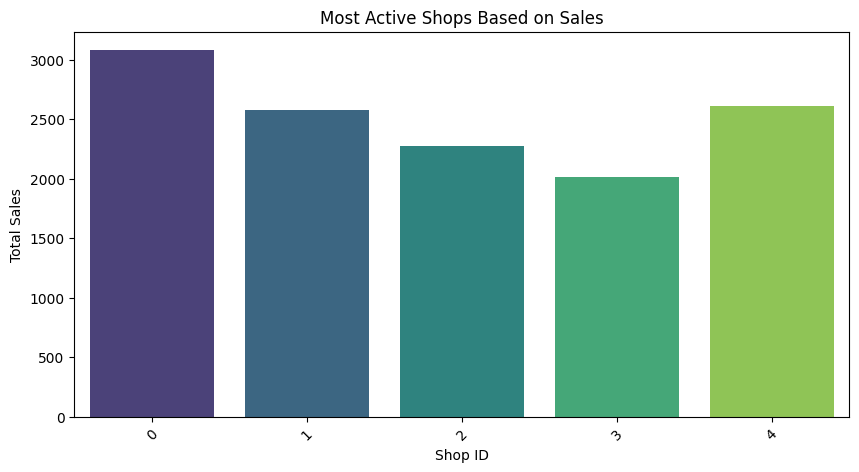

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("sales_data.csv")

# Encode categorical variables
encoder = LabelEncoder()
df["shop_id"] = encoder.fit_transform(df["shop_id"])
df["Product_ID"] = encoder.fit_transform(df["Product_ID"])

# Select features and target
X = df[["shop_id", "Product_ID", "Historical_Sales", "Promotion", "Day_of_Week", "Month"]]
y = df["Demand"]

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Performance: MAE={mae:.2f}, R²={r2:.2f}")

# Plot the most active shop (highest sales) using a line graph
active_shop = df.groupby("shop_id")["Historical_Sales"].sum().reset_index()
active_shop = active_shop.sort_values(by="Historical_Sales", ascending=False)

plt.figure(figsize=(10, 5))
plt.plot(active_shop["shop_id"], active_shop["Historical_Sales"], marker='o', linestyle='-', color='b')
plt.xlabel("Shop ID")
plt.ylabel("Total Sales")
plt.title("Most Active Shops Based on Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
